## 1 Epsilon-Greedy
#### Question 2 (4 Points). Implement an experiment that compares the ε-greedy policy and the UCB policy on the two- coin betting game. Run a few scenarios (design your own): small vs. large gap, several choices of ε. Plot the different accumulative reward curves over time.


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
np.random.normal(0, 1, 2)

array([-0.18122215,  0.05380215])

In [3]:
 np.linspace(0.2, 0.7, 10)

array([0.2       , 0.25555556, 0.31111111, 0.36666667, 0.42222222,
       0.47777778, 0.53333333, 0.58888889, 0.64444444, 0.7       ])

In [4]:
 np.random.choice(2)

0

In [5]:
np.array([0,1])

array([0, 1])

In [6]:
class Eps_Greedy:    
    def __init__(self, k, eps, iters, mu):
        # Number of arms
        self.k = k
        # Search probability
        self.eps = eps
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.zeros(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)
        
        self.mu = mu
        
    def pull(self):
        p = np.random.rand()
        if self.eps == 0 and self.n == 0:
            a = np.random.choice(self.k)
        elif p < self.eps:
            a = np.random.choice(self.k)
        else:
            a = np.argmax(self.k_reward)
            
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
        
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self, mu):
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)
        self.mu = mu

In [7]:
class UCB:
    def __init__(self, k, c, iters, mu):
        # Number of arms
        self.k = k
        # Exploration parameter
        self.c = c
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 1
        # Step count for each arm
        self.k_n = np.ones(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k) 
        self.mu = mu
        
    def pull(self):
        a = np.argmax(self.k_reward + self.c * np.sqrt(2 * (np.log(self.n)) / self.k_n))         
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
        
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self, mu):
        # Resets results while keeping settings
        self.n = 1
        self.k_n = np.ones(self.k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(self.k)
        self.mu = mu

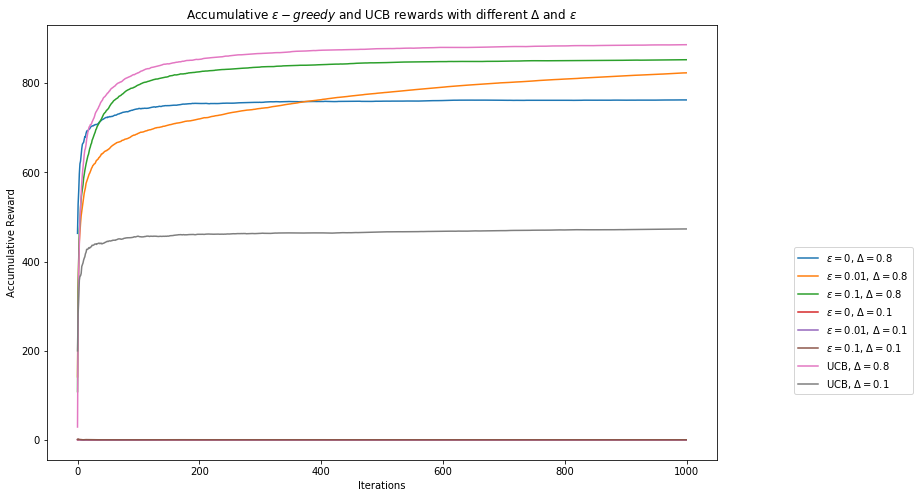

In [9]:
k = 2
iters = 1000

eps_0_large_rewards = np.zeros(iters)
eps_01_large_rewards = np.zeros(iters)
eps_1_large_rewards = np.zeros(iters)

eps_0_small_rewards = np.zeros(iters)
eps_01_small_rewards = np.zeros(iters)
eps_1_small_rewards = np.zeros(iters)

ucb_large_rewards = np.zeros(iters)
ucb_small_rewards = np.zeros(iters)

episodes = 1000
mu_small_gap = np.array([0.4,0.5])
mu_large_gap = np.array([0.1,0.9])

for i in range(episodes): 
    eps_0_large = Eps_Greedy(k, 0, iters, mu_large_gap)
    eps_01_large = Eps_Greedy(k, 0.01, iters, mu_large_gap)
    eps_1_large = Eps_Greedy(k, 0.1, iters, mu_large_gap)
    
    eps_0_small = Eps_Greedy(k, 0, iters, mu_small_gap)
    eps_01_small = Eps_Greedy(k, 0.01, iters, mu_small_gap)
    eps_1_small = Eps_Greedy(k, 0.1, iters, mu_small_gap)
    
    ucb_large = UCB(k, 1, iters, mu_large_gap)
    ucb_small = UCB(k, 1, iters, mu_small_gap)
    # Run experiments
    eps_0_large.run()
    eps_01_large.run()
    eps_1_large.run()   
    
    eps_0_small.run()
    eps_01_small.run()
    eps_1_small.run() 
    
    ucb_large.run()
    ucb_small.run()
    
    
    # Update long-term averages
    eps_0_large_rewards += eps_0_large.reward
    eps_01_large_rewards += eps_01_large.reward 
    eps_1_large_rewards += eps_1_large.reward
    
    eps_0_small_rewards = eps_0_small.reward
    eps_01_small_rewards = eps_01_small.reward
    eps_1_small_rewards = eps_1_small.reward
    
    ucb_large_rewards += ucb_large.reward
    ucb_small_rewards += ucb_small.reward
    
        
plt.figure(figsize=(12,8))
plt.plot(eps_0_large_rewards, label="$\epsilon=0$, $\Delta=0.8$")
plt.plot(eps_01_large_rewards, label="$\epsilon=0.01$, $\Delta=0.8$")
plt.plot(eps_1_large_rewards, label="$\epsilon=0.1$, $\Delta=0.8$")
plt.plot(eps_0_small_rewards, label="$\epsilon=0$, $\Delta=0.1$")
plt.plot(eps_01_small_rewards, label="$\epsilon=0.01$, $\Delta=0.1$")
plt.plot(eps_1_small_rewards, label="$\epsilon=0.1$, $\Delta=0.1$")
plt.plot(ucb_large_rewards, label="UCB, $\Delta=0.8$")
plt.plot(ucb_small_rewards, label="UCB, $\Delta=0.1$")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Accumulative Reward")
plt.title("Accumulative $\epsilon-greedy$ and UCB rewards with different $\Delta$ and $\epsilon$")
plt.show()